# <a name="0">Hierarchical Clustering</a>

1. <a href="#1">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
4. <a href="#5">Training datasets</a>
5. <a href="#6">Improvement ideas</a>



In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/fernandol/countries-of-the-world
then import it in python.

In [2]:
#read the data

# data_path = ''  #the path where you downloaded the data
df = pd.read_csv('countries of the world.csv')

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (227, 20)


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find** 

In [3]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [4]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

Country                               0.00
Region                                0.00
Population                            0.00
Area (sq. mi.)                        0.00
Pop. Density (per sq. mi.)            0.00
Coastline (coast/area ratio)          0.00
Net migration                         1.32
Infant mortality (per 1000 births)    1.32
GDP ($ per capita)                    0.44
Literacy (%)                          7.93
Phones (per 1000)                     1.76
Arable (%)                            0.88
Crops (%)                             0.88
Other (%)                             0.88
Climate                               9.69
Birthrate                             1.32
Deathrate                             1.76
Agriculture                           6.61
Industry                              7.05
Service                               6.61
dtype: float64

In [5]:
# This will print basic statistics for numerical columns
df.describe()

,Population,Area (sq. mi.),GDP ($ per capita)
count,2.270000e+02,2.270000e+02,226.000000
mean,2.874028e+07,5.982270e+05,9689.823009
std,1.178913e+08,1.790282e+06,10049.138513
min,7.026000e+03,2.000000e+00,500.000000
25%,4.376240e+05,4.647500e+03,1900.000000
50%,4.786994e+06,8.660000e+04,5550.000000
75%,1.749777e+07,4.418110e+05,15700.000000
max,1.313974e+09,1.707520e+07,55100.000000


In [7]:
df.median()

Population            4786994.0
Area (sq. mi.)          86600.0
GDP ($ per capita)       5550.0
dtype: float64

array([[<AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'Area (sq. mi.)'}>],
       [<AxesSubplot:title={'center':'GDP ($ per capita)'}>,
        <AxesSubplot:>]], dtype=object)

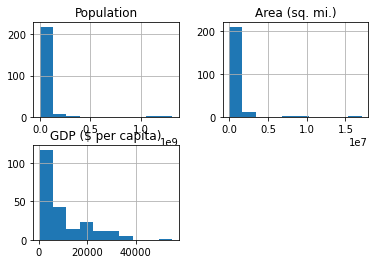

In [9]:
df.hist()

## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
1-  Data has some features with null values (only first six features hasn't any nulls).\
2-  Some Features has not proper data type (Object instead of int or float dtypes).\
3-  Data has outliers (There is difference between mean and median values).

In [6]:
#make a copy for the original dataset
df_copy=df.copy()

### for each issue adapt this methodology 
- start by defining the solution
- apply this solution on the data
- test the solution to make sure that you have solved the issue

**First issue**

In [11]:
#solution 
df = df.dropna()

In [12]:
#test 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             179 non-null    object 
 1   Region                              179 non-null    object 
 2   Population                          179 non-null    int64  
 3   Area (sq. mi.)                      179 non-null    int64  
 4   Pop. Density (per sq. mi.)          179 non-null    object 
 5   Coastline (coast/area ratio)        179 non-null    object 
 6   Net migration                       179 non-null    object 
 7   Infant mortality (per 1000 births)  179 non-null    object 
 8   GDP ($ per capita)                  179 non-null    float64
 9   Literacy (%)                        179 non-null    object 
 10  Phones (per 1000)                   179 non-null    object 
 11  Arable (%)                          179 non-n

In [14]:
df.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

**Second issue**

In [24]:
selected_columns = ['Population', 'Area (sq. mi.)', 'GDP ($ per capita)']

In [30]:
#solution 
for i in selected_columns:
    df[i] = df[i].astype(float)

In [31]:
#test 
df[selected_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 0 to 226
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Population          163 non-null    float64
 1   Area (sq. mi.)      163 non-null    float64
 2   GDP ($ per capita)  163 non-null    float64
dtypes: float64(3)
memory usage: 5.1 KB


**Third issue**

In [27]:
def removeOutliers(df,outliersColomns):
    z_scores = stats. zscore(df[outliersColomns]) 
    abs_z_scores = np. abs(z_scores)
    filtered_entries = (abs_z_scores < 3). all(axis=1)
    new_df = df[filtered_entries]
    return new_df

In [28]:
df = removeOutliers(df, selected_columns)

In [32]:
df[selected_columns].describe()

,Population,Area (sq. mi.),GDP ($ per capita)
count,1.630000e+02,1.630000e+02,163.000000
mean,1.345818e+07,2.764665e+05,8901.840491
std,2.042450e+07,4.012061e+05,9208.319322
min,1.347700e+04,2.800000e+01,500.000000
25%,8.364715e+05,1.565150e+04,1800.000000
50%,5.670544e+06,9.848000e+04,5100.000000
75%,1.389220e+07,3.495105e+05,12950.000000
max,1.074495e+08,1.972550e+06,36000.000000


In [21]:
df[outlier_columns].median()

Population            6437472.5
Area (sq. mi.)         111730.0
GDP ($ per capita)       5050.0
dtype: float64

## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

In [34]:
from sklearn.preprocessing import MinMaxScaler
def scaled_column(df,column):
    return MinMaxScaler().fit_transform(np.array(df[column]).reshape(-1,1))

In [35]:
for col_name in df.columns:
    if col_name  in selected_columns:
        df[col_name]=scaled_column(df,col_name)

array([[<AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'Area (sq. mi.)'}>],
       [<AxesSubplot:title={'center':'GDP ($ per capita)'}>,
        <AxesSubplot:>]], dtype=object)

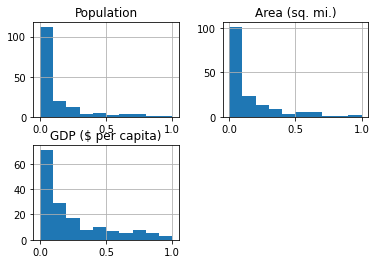

In [36]:
df.hist()

In [37]:
from sklearn import preprocessing

In [41]:
min_max_scaler = preprocessing.MinMaxScaler()
df[selected_columns] = min_max_scaler.fit_transform(df[selected_columns].values)
df[selected_columns]

,Population,Area (sq. mi.),GDP ($ per capita)
0,0.288949,0.328246,0.005634
1,0.033212,0.014560,0.112676
6,0.000000,0.000038,0.228169
7,0.000518,0.000210,0.295775
9,0.027578,0.015093,0.084507
...,...,...,...
218,0.239370,0.462363,0.121127
219,0.785486,0.167061,0.056338
224,0.199586,0.267648,0.008451
225,0.106934,0.381535,0.008451


## 5. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
1- Linkage criteria : The linkage criterion determines the distance between two clusters
    - Complete-Linkage Clustering
    - Single-Linkage Clustering
    - Average-Linkage Clustering
    - Centroid Linkage Clustering
2- Distance function:
    - Euclidean Distance 
    - Manhattan Distance 
    - Mahalanobis distance 
3- Number of clusters


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [42]:
import scipy.cluster.hierarchy as shc

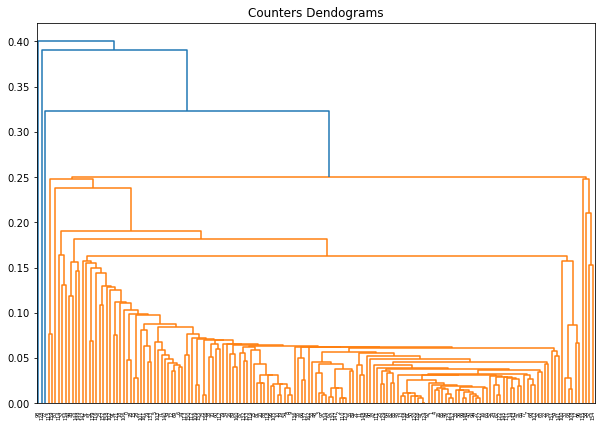

In [50]:
#fill y with your dataframe and method with linkage criteria and metric with distance function
plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df[selected_columns] , method='single', metric='euclidean', optimal_ordering=False) )


In [51]:
#training
from sklearn.cluster import AgglomerativeClustering

In [70]:
aggloclust = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=5).fit(df[selected_columns])
print(aggloclust)

labels = aggloclust.labels_
print(labels)


AgglomerativeClustering(n_clusters=5)
[0 0 0 0 0 2 2 0 2 2 2 0 2 0 0 2 0 3 0 2 2 0 0 1 0 0 0 0 2 0 3 0 3 0 0 0 0
 0 2 2 0 0 0 0 1 0 0 0 0 1 0 2 4 0 2 0 0 0 4 0 2 0 0 0 0 0 0 0 0 2 2 2 1 0
 2 2 0 0 0 0 4 2 0 0 0 0 0 2 2 0 0 0 0 3 0 2 3 0 1 0 3 0 0 2 0 2 2 0 3 2 0
 0 0 0 3 1 0 2 2 2 0 0 0 0 0 0 0 0 3 0 0 0 2 0 3 4 0 0 0 2 2 0 2 0 1 0 0 0
 0 1 0 0 1 2 4 2 0 0 3 1 0 0 0]


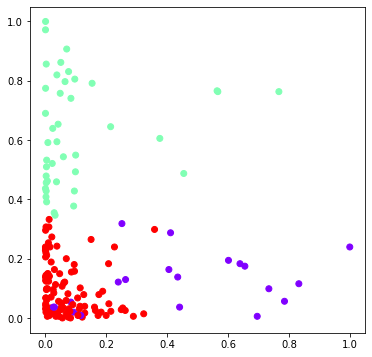

In [69]:
aggCluster3 = AgglomerativeClustering(n_clusters = 3)
plt.figure(figsize =(6, 6))
plt.scatter(df['Population'], df['GDP ($ per capita)'], c = aggCluster3.fit_predict(df[selected_columns]), cmap ='rainbow')
plt.show()


## 6. <a name="6">improvement ideas</a>
(<a href="#0">Go to top</a>)

- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#gap-statistic-method 

In [72]:
from sklearn.preprocessing import StandardScaler, normalize

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[selected_columns])

X_normalized = normalize(X_scaled)

X_normalized = pd.DataFrame(X_normalized)


In [76]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = [ 'Area (sq. mi.)', 'GDP ($ per capita)']

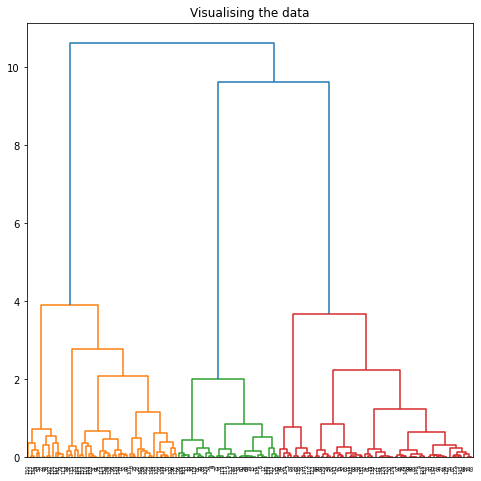

In [77]:
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))